In [68]:
#import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm

In [88]:
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import r2_score

In [8]:
data = pd.read_excel('Passenger.xlsx')
data

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


## Check stationarity 


In [12]:
# H0 : Our data is not stationarity
# H1 : Our data is stationarity

check = data['Passengers'].values
res = adfuller(check)
print(res[0])
print(res[1])

0.8153688792060597
0.9918802434376411


In [14]:
if (res[1] > 0.05):
    print('Accept H0')
else:
    print('Accept H1')

Accept H0


#### Conclusion 
- data is not stationarity

## Apply transformation


In [16]:
# Try log transformation

data['tr_log'] = np.log(data['Passengers'])

ck_log = data['tr_log'].values
res = adfuller(ck_log)
print(res[0])
print(res[1])

-1.7170170891069636
0.4223667747703897


In [40]:
# 1st order diff
data['Diff_1'] = data['Passengers'] - data['Passengers'].shift(1)
ck_diff = data['Diff_1'].dropna().values
res = adfuller(ck_diff)
print(res[0])
print(res[1])

-2.829266824169992
0.0542132902838265


In [30]:
# power tranformation
data['Power_tr'] = data['tr_log'] - data['tr_log'].shift(1)
ck_power = data['Power_tr'].dropna().values
res = adfuller(ck_power)
print(res[0])
print(res[1])

-2.7171305983881675
0.07112054815085295


## Moving Avg

<Axes: >

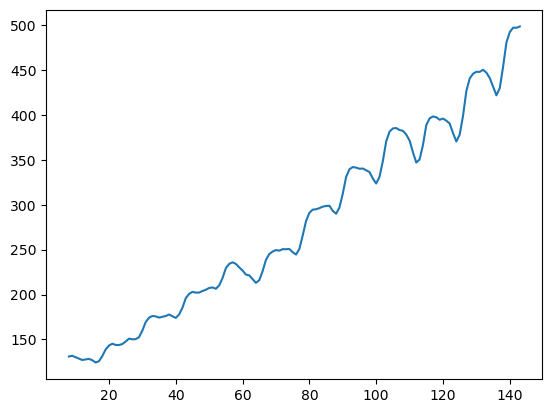

In [21]:
data['MA'] = data['Passengers'].rolling(window=9).mean()
data['MA'].plot()

In [33]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [34]:
acf_val = acf(data['tr_log'].dropna())
acf_val

array([1.        , 0.95370337, 0.89891595, 0.85080249, 0.80842517,
       0.77889939, 0.75644222, 0.73760171, 0.72713135, 0.7336487 ,
       0.74425525, 0.75802665, 0.76194292, 0.71650448, 0.66304279,
       0.61836286, 0.57620873, 0.54380132, 0.51945611, 0.50070292,
       0.4904028 , 0.4981819 ])

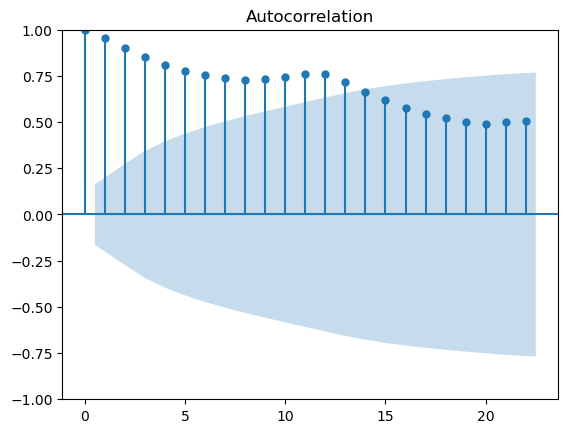

In [35]:
plot_acf(data['tr_log'])
plt.show()

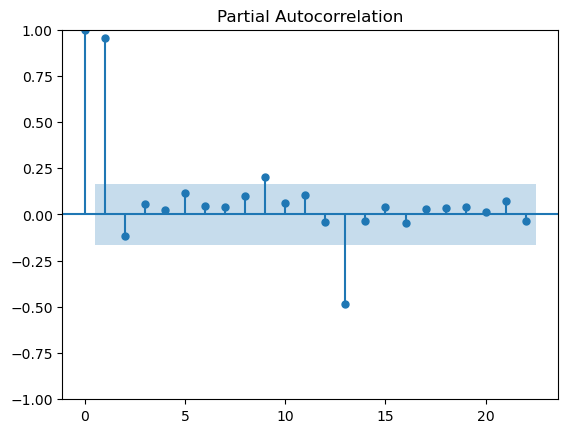

In [38]:
plot_pacf(data['tr_log'])
plt.show()

## ARIMA

In [103]:
df = pd.read_excel('ELECTRIC_PRODUCTION.xlsx')
df

,DATE,Value
0,1985-01-01,72.5052
1,1985-01-02,70.6720
2,1985-01-03,62.4502
3,1985-01-04,57.4714
4,1985-01-05,55.3151
...,...,...
392,2017-01-09,98.6154
393,2017-01-10,93.6137
394,2017-01-11,97.3359
395,2017-01-12,114.7212


<Axes: >

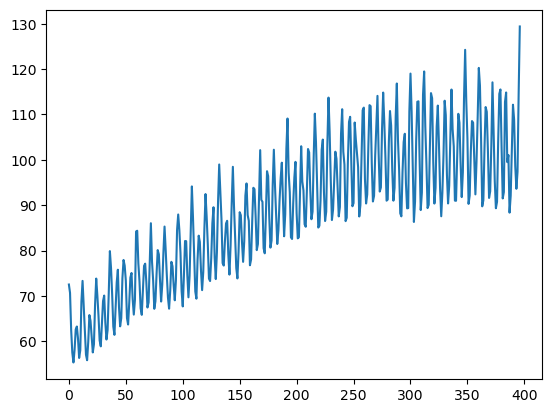

In [55]:
df['Value'].plot()

<Axes: >

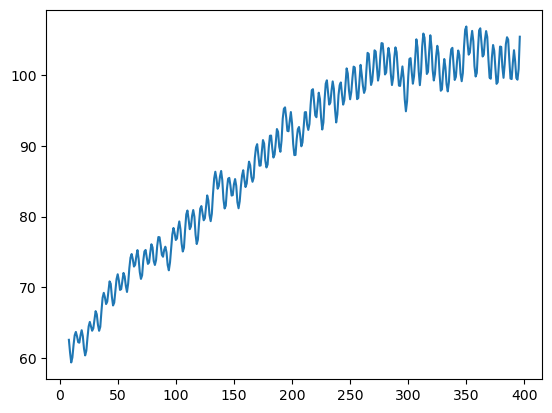

In [50]:
df['MA'] = df['Value'].rolling(window=9).mean()
df['MA'].plot(label='Electric Pro')

In [104]:
df['DATE'] = pd.to_datetime(df['DATE'])
df

,DATE,Value
0,1985-01-01,72.5052
1,1985-01-02,70.6720
2,1985-01-03,62.4502
3,1985-01-04,57.4714
4,1985-01-05,55.3151
...,...,...
392,2017-01-09,98.6154
393,2017-01-10,93.6137
394,2017-01-11,97.3359
395,2017-01-12,114.7212


In [105]:
df.index = df['DATE']
df

,DATE,Value
DATE,,
1985-01-01,1985-01-01,72.5052
1985-01-02,1985-01-02,70.6720
1985-01-03,1985-01-03,62.4502
1985-01-04,1985-01-04,57.4714
1985-01-05,1985-01-05,55.3151
...,...,...
2017-01-09,2017-01-09,98.6154
2017-01-10,2017-01-10,93.6137
2017-01-11,2017-01-11,97.3359


In [106]:
df = df.drop('DATE', axis =1).dropna()
df

,Value
DATE,
1985-01-01,72.5052
1985-01-02,70.6720
1985-01-03,62.4502
1985-01-04,57.4714
1985-01-05,55.3151
...,...
2017-01-09,98.6154
2017-01-10,93.6137
2017-01-11,97.3359


<Axes: xlabel='DATE'>

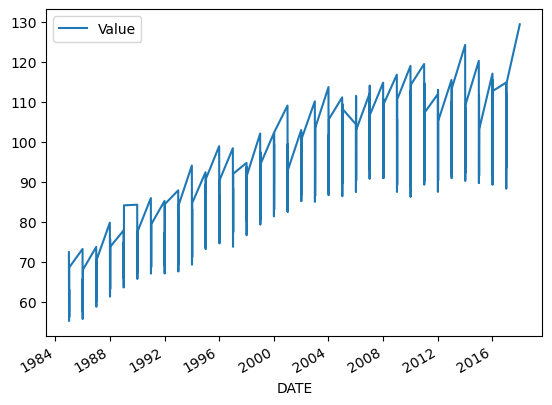

In [107]:
df.plot()

array([[<Axes: title={'center': 'Value'}>]], dtype=object)

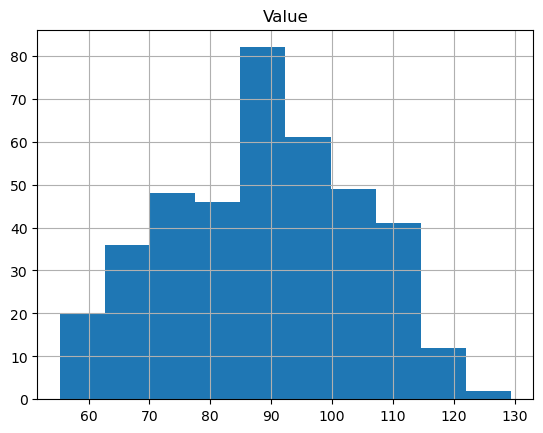

In [151]:
df.hist()

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima as pm

In [108]:
result = seasonal_decompose(df, model= 'multiplicative', period =12)

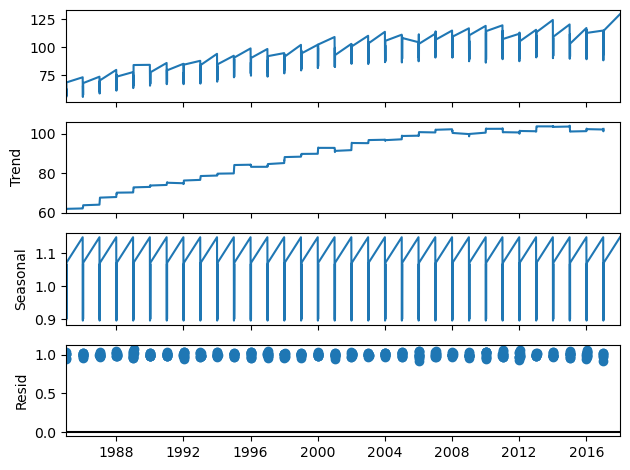

In [109]:
result.plot()
plt.show()

### stepwise
Sure, here's what each parameter in the `pm.auto_arima` function means:

- `df`: This is the dataset you're fitting the ARIMA model to.

- `start_p` and `start_q`: These parameters specify the initial guess for the `p` and `q` parameters of the ARIMA model. `p` is the order of the autoregressive part, and `q` is the order of the moving average part.

- `max_p` and `max_q`: These parameters specify the maximum values that `p` and `q` can take. The function will not consider models with `p` or `q` greater than these values.

- `m`: This is the number of periods in each season. For example, if you have monthly data and the seasons are yearly, you would set `m=12`.

- `start_P`: This is the initial guess for the `P` parameter of the seasonal component of the model.

- `seasonal`: This is a boolean flag indicating whether to include a seasonal component in the model.

- `d` and `D`: These parameters specify the order of differencing in the model. `d` is the order of non-seasonal differencing, and `D` is the order of seasonal differencing.

- `trace`: If this is set to `True`, the function will print out information about each step of the fitting process.

- `error_action`: This parameter specifies what should happen if an error occurs while fitting a particular model. If it's set to `'ignore'`, the function will simply skip that model and move on to the next one.

- `suppress_warnings`: If this is set to `True`, the function will not print out any warnings that occur during the fitting process.

- `stepwise`: If this is set to `True`, the function will use a stepwise algorithm to find the best model. This can be faster than fitting all possible models, but it might not always find the absolute best model.

Remember, the `auto_arima` function is trying to find the best ARIMA model for your data. It does this by fitting many different models and choosing the one that minimizes the Akaike Information Criterion (AIC). The AIC is a measure of the quality of a statistical model. It takes into account both the goodness of fit and the complexity of the model. The model with the lowest AIC is considered the best. 

I hope this helps! Let me know if you have any other questions.

In [110]:
stepwise_model = pm.auto_arima(df, start_p=1, start_q=2, 
                               max_p=3, max_q=3, 
                               m=12,
                               start_P=0, seasonal=True, d=1, D=1, trace=True,
                               error_action='ignore', suppress_warnings=True,
                               stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=1785.556, Time=0.52 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2010.162, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1940.101, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1835.298, Time=0.18 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1923.073, Time=0.23 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1787.102, Time=0.63 sec
 ARIMA(1,1,2)(0,1,2)[12]             : AIC=1786.742, Time=2.15 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=1873.320, Time=0.45 sec
 ARIMA(1,1,2)(1,1,2)[12]             : AIC=1784.983, Time=1.92 sec
 ARIMA(1,1,2)(2,1,2)[12]             : AIC=1771.882, Time=2.27 sec
 ARIMA(1,1,2)(2,1,1)[12]             : AIC=1773.624, Time=1.35 sec
 ARIMA(0,1,2)(2,1,2)[12]             : AIC=1778.320, Time=1.54 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=1770.670, Time=1.57 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=1785.329, Time=1.62 sec
 ARIMA(1,1,1)(2,1,1

In [111]:
print(stepwise_model.aic())

1770.2279435200649


In [140]:
train = df.loc['1985-01-01':'2009-01-09']
train

,Value
DATE,
1985-01-01,72.5052
1985-01-02,70.6720
1985-01-03,62.4502
1985-01-04,57.4714
1985-01-05,55.3151
...,...
2009-01-05,87.5366
2009-01-06,97.2387
2009-01-07,103.9086


In [147]:
test = df.loc['2009-01-10':'2018-01-01']
test

,Value
DATE,
2009-01-10,89.2977
2009-01-11,89.3585
2009-01-12,110.6844
2010-01-01,119.0166
2010-01-02,110.5330
...,...
2017-01-09,98.6154
2017-01-10,93.6137
2017-01-11,97.3359


In [148]:
stepwise_model.fit(train)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True)

In [156]:
future_forecast = stepwise_model.predict(n_periods=13)
future_forecast

C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


297     90.009212
298     93.036557
299    108.216854
300    114.213258
301    107.838328
302    100.786475
303     90.985423
304     91.861577
305    101.544148
306    109.372294
307    111.455768
308     99.702757
309     93.030217
dtype: float64

<Axes: >

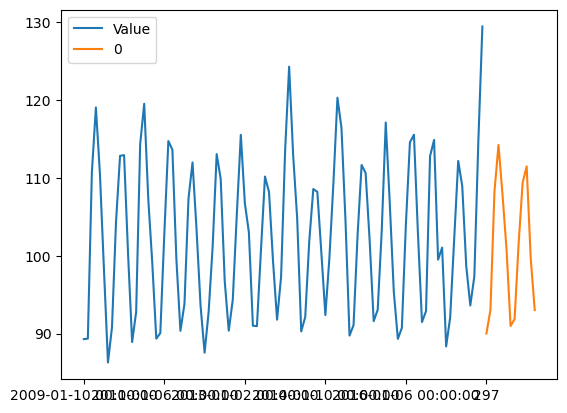

In [160]:
#future_df = pd.DataFrame(future_forecast, index = test.index, columns=['Prediction'])
pd.concat([test, future_forecast], axis=1).plot()
#pd.concat([df, future_forecast], axis = 1).plot()

In [158]:
r2_score(test[:13], future_forecast)



0.9233490598261282

In [5]:
help(pm.auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R function,
    ``forecast::auto.arima`` [3].
